In [1]:
import os
import sys

import numpy as np
#from skimage import io
#import skimage
import matplotlib.pyplot as plt
#from meta_load import *
import pickle

sys.path.append(os.path.join("..",'Data_prep'))
sys.path.append(os.path.join("..",'Models2'))

from Custom_dataloader import *
import pandas as pd
import matplotlib.pyplot as plt

#DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base"
#DBd="//MYCLOUDPR4100/Paltas_DataBase/Data_Base"
#DB="//MYCLOUDPR4100/Paltas_DataBase"
DB="/home/liiarpi-01/proyectopaltas/Local_data_base/Data_Base_v2"
meta_dir="/home/liiarpi-01/proyectopaltas/Local_data_base/metadata_GMVAE_A1_2"
#d_t=transforms.Compose([phantom_segmentation(False)])

datar=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False,retrieve_img=False)

In [2]:
metad=np.array(os.listdir(meta_dir)[1:])
metad_dict=np.vectorize(lambda meta: pickle.load(open(os.path.join(meta_dir,meta),'rb')))(metad)

In [3]:
def get_dataframe(array_dict):
    DF=pd.DataFrame(array_dict)
    for k in list(array_dict[0].keys()):
        if isinstance(metad_dict[0][k],list):
            DF[k]=np.vectorize(lambda rd:rd[k][0])(array_dict)
        else:
            for i in np.arange(array_dict[0][k].shape[1]):
                #DF[k+"_"+str(i)]=metad_dict[0][k][0,i]
                DF[k+"_"+str(i)]=np.vectorize(lambda rd:rd[k][0,i])(array_dict)
    DF.drop(0,axis=1,inplace=True)
    return DF

In [ ]:
headers=[]
for k in list(metad_dict[0].keys()):
    if isinstance(metad_dict[0][k],list):
        headers.append(k)
        #DF[k]=metad_dict[0][k][0]
        DF[k]=np.vectorize(lambda rd:rd['k'][0])(metad_dict)
    else:
        for i in np.arange(metad_dict[0][k].shape[1]):
            print(headers)
            headers.append(k+"_"+str(i))
            #DF[k+"_"+str(i)]=metad_dict[0][k][0]
            #DF[k+"_"+str(i)]=metad_dict[0][k][0,i]
            DF[k+"_"+str(i)]=np.vectorize(lambda rd:rd['z_x_mu'][0,i])(metad_dict)

In [4]:
mDF=get_dataframe(metad_dict)
data=mDF
mDF

,z_x_mu_0,z_x_mu_1,z_x_mu_2,z_x_mu_3,z_x_mu_4,z_x_logsig_0,z_x_logsig_1,z_x_logsig_2,z_x_logsig_3,z_x_logsig_4,...,py_5,py_6,py_7,py_8,py_9,py_10,py_11,Place,Date,Class
0,1.226943,-0.735718,-0.644057,1.430477,1.710736,0.0,0.0,0.0,0.0,0.0,...,0.083011,0.083312,0.083465,0.083256,0.083507,0.083275,0.083409,6_A,16_junio_1,N_Exceso
1,-0.686828,-2.931506,-0.840768,-5.264722,-4.424634,0.0,0.0,0.0,0.0,0.0,...,0.083339,0.083519,0.083147,0.083286,0.083396,0.083619,0.083072,4_D,29_marzo_1,Control
2,0.622476,-1.276294,2.713542,-1.909442,1.363258,0.0,0.0,0.0,0.0,0.0,...,0.083331,0.083345,0.083367,0.083316,0.083177,0.083327,0.083345,19_G,16_junio_1,Control
3,1.814916,1.993920,0.985770,1.645794,1.756575,0.0,0.0,0.0,0.0,0.0,...,0.083531,0.082878,0.083441,0.083399,0.083177,0.083360,0.083492,4_A,26_mayo_1,N_Exceso
4,1.692554,-0.434313,0.967884,1.223063,-0.156023,0.0,0.0,0.0,0.0,0.0,...,0.083291,0.083300,0.083330,0.083356,0.083263,0.083355,0.083321,15_F,28_abril_2,H75%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,3.481685,0.067505,1.668355,-0.666159,-0.202151,0.0,0.0,0.0,0.0,0.0,...,0.083316,0.083132,0.083371,0.083403,0.083257,0.083316,0.083412,2_D,19_mayo_2,Control
3848,1.482849,1.435127,1.106577,2.310173,0.894225,0.0,0.0,0.0,0.0,0.0,...,0.083384,0.083361,0.083287,0.083326,0.083239,0.083459,0.083250,9_C,9_julio_1,K_Control
3849,-4.504982,-3.483152,-1.558088,-3.040207,-1.875820,0.0,0.0,0.0,0.0,0.0,...,0.083356,0.083463,0.083222,0.083287,0.083311,0.083530,0.083164,13_E,14_abril_2,H50%
3850,1.253831,3.146727,1.778033,0.891150,2.803267,0.0,0.0,0.0,0.0,0.0,...,0.082976,0.082970,0.083466,0.083428,0.083575,0.083248,0.083530,8_F,19_agosto_1,H75%


In [5]:
#Clasificación para detección de deficiencia hidrica
data=mDF
data=mDF[(data['Class']=='Control')|\
          #(data['Y']=='K_Control')|\
          #(data['Y']=='N_Control')|\
          #(data['Y']=='P_Control')|\
          (data['Class']=='H50%')\
           #(data['Y']=='H75%')\
         ]
#X=data[list(data.columns[1:7]) + list(data.columns[16:])]
X=data[list(data.columns[0:-3])]
print(X.columns)
Yo=((data['Class']=='Control') |\
    (data['Class']=='K_Control') |\
    (data['Class']=='N_Control') |\
    (data['Class']=='P_Control')).astype(int)
Yo

Index(['z_x_mu_0', 'z_x_mu_1', 'z_x_mu_2', 'z_x_mu_3', 'z_x_mu_4',
       'z_x_logsig_0', 'z_x_logsig_1', 'z_x_logsig_2', 'z_x_logsig_3',
       'z_x_logsig_4', 'w_x_mu_0', 'w_x_mu_1', 'w_x_mu_2', 'w_x_mu_3',
       'w_x_mu_4', 'w_x_logsig_0', 'w_x_logsig_1', 'w_x_logsig_2',
       'w_x_logsig_3', 'w_x_logsig_4', 'py_0', 'py_1', 'py_2', 'py_3', 'py_4',
       'py_5', 'py_6', 'py_7', 'py_8', 'py_9', 'py_10', 'py_11'],
      dtype='object')


1       1
2       1
5       1
8       1
11      0
       ..
3843    0
3844    0
3846    1
3847    1
3849    0
Name: Class, Length: 1663, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

GR=np.arange(1,7)
def LR_GR(GR,X,Y):
    polynomial_features = PolynomialFeatures(degree=GR)
    r=polynomial_features.fit_transform(X[:,:])
    #Xco=np.hstack((r,np.array(X[:,6:])))
    Xco=r
    X_train, X_test, y_train, y_test = train_test_split(Xco, Y, random_state=20,train_size=0.8)
    Lr1=LogisticRegression(max_iter=90000000000,C=0.005509999999999979)
    #Lr1=LogisticRegression(max_iter=90000000000)
    Lr1.fit(X_train,y_train)
    pr_tr=Lr1.score(X_train,y_train)
    pr_ts=Lr1.score(X_test,y_test)
    print(GR)
    print(' R^2_train: ', pr_tr)
    print(' R^2_test: ', pr_ts)
    return Lr1,GR,pr_tr,pr_ts
v_LR_GR=np.vectorize(LR_GR,signature='(),(j,k),(l)->(),(),(),()')
LR,GR,pr_tr2,pr_ts2=v_LR_GR(GR,X,np.array(Yo))

plt.plot(GR,pr_tr2, 'ro--')
plt.plot(GR,pr_ts2, 'bo--')
plt.show()

plt.bar(np.arange(LR[np.argmax(pr_ts2)].coef_[0].shape[0]),np.abs(LR[np.argmax(pr_ts2)].coef_[0]))
plt.show()

#plt.bar(np.arange(LR[0].coef_[0].shape[0]),np.abs(LR[0].coef_[0].sort()))
#plt.show()

1
 R^2_train:  0.6556390977443609
 R^2_test:  0.6606606606606606
2
 R^2_train:  0.6609022556390978
 R^2_test:  0.6576576576576577
3
 R^2_train:  0.6864661654135338
 R^2_test:  0.6726726726726727
4
 R^2_train:  0.7218045112781954
 R^2_test:  0.6546546546546547


0.005
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.00501
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.005019999999999999
 R^2_train:  0.7639097744360902
 R^2_test:  0.6936936936936937
0.005029999999999999
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.0050399999999999985
 R^2_train:  0.7631578947368421
 R^2_test:  0.6936936936936937
0.005049999999999998
 R^2_train:  0.7631578947368421
 R^2_test:  0.6966966966966966
0.005059999999999998
 R^2_train:  0.7631578947368421
 R^2_test:  0.6966966966966966
0.005069999999999997
 R^2_train:  0.7631578947368421
 R^2_test:  0.6966966966966966
0.005079999999999997
 R^2_train:  0.7631578947368421
 R^2_test:  0.6936936936936937
0.0050899999999999964
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.005099999999999996
 R^2_train:  0.762406015037594
 R^2_test:  0.6936936936936937
0.005109999999999996
 R^2_train:  0.7631578947368421
 R^2_test:  0.6966966966966966
0.00511999999999999

0.00598999999999996
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.005999999999999959
 R^2_train:  0.7639097744360902
 R^2_test:  0.6996996996996997
0.006009999999999959
 R^2_train:  0.7631578947368421
 R^2_test:  0.6966966966966966
0.0060199999999999585
 R^2_train:  0.7631578947368421
 R^2_test:  0.7027027027027027
0.006029999999999958
 R^2_train:  0.7631578947368421
 R^2_test:  0.6966966966966966
0.006039999999999958
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.006049999999999957
 R^2_train:  0.7616541353383459
 R^2_test:  0.6996996996996997
0.006059999999999957
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.0060699999999999565
 R^2_train:  0.762406015037594
 R^2_test:  0.6996996996996997
0.006079999999999956
 R^2_train:  0.7631578947368421
 R^2_test:  0.6996996996996997
0.006089999999999956
 R^2_train:  0.7631578947368421
 R^2_test:  0.6966966966966966
0.006099999999999955
 R^2_train:  0.762406015037594
 R^2_test:  0.6996996996

0.00696999999999992
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.006979999999999919
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966
0.006989999999999919
 R^2_train:  0.7639097744360902
 R^2_test:  0.6966966966966966


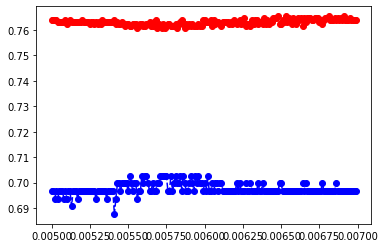

In [148]:
polynomial_features = PolynomialFeatures(degree=5)
Xc=polynomial_features.fit_transform(X[X.columns[:6]])
Xc=np.hstack((X[X.columns[6:]],Xc))
C=np.arange(0.005,0.007,0.00001)
def LR_C(C,X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=20,train_size=0.8)
    Lr1=LogisticRegression(max_iter=900000,C=C)
    Lr1.fit(X_train,y_train)
    pr_tr=Lr1.score(X_train,y_train)
    pr_ts=Lr1.score(X_test,y_test)
    print(C)
    print(' R^2_train: ', pr_tr)
    print(' R^2_test: ', pr_ts)
    return Lr1,C,pr_tr,pr_ts
v_LR_C=np.vectorize(LR_C,signature='(),(j,k),(l)->(),(),(),()')

LR,C,pr_tr1,pr_ts1=v_LR_C(C,Xc,np.array(Yo))

plt.plot(C,pr_tr1, 'ro--')
plt.plot(C,pr_ts1, 'bo--')
plt.show()

In [ ]:
print(np.max(pr_ts1))
C[np.argmax(pr_ts1)]

In [13]:
print(np.max(np.abs(LR[np.argmax(pr_ts2)].coef_[0])))
polynomial_features = PolynomialFeatures(degree=5)
np.hstack((np.array(polynomial_features.get_feature_names(X.columns))))[np.abs(LR[np.argmax(pr_ts2)].coef_[0])>0.1]

0.11818738409239794


NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
X

,z_x_mu_0,z_x_mu_1,z_x_mu_2,z_x_mu_3,z_x_mu_4,z_x_logsig_0,z_x_logsig_1,z_x_logsig_2,z_x_logsig_3,z_x_logsig_4,...,py_2,py_3,py_4,py_5,py_6,py_7,py_8,py_9,py_10,py_11
1,-0.686828,-2.931506,-0.840768,-5.264722,-4.424634,0.0,0.0,0.0,0.0,0.0,...,0.083366,0.083233,0.083151,0.083339,0.083519,0.083147,0.083286,0.083396,0.083619,0.083072
2,0.622476,-1.276294,2.713542,-1.909442,1.363258,0.0,0.0,0.0,0.0,0.0,...,0.083234,0.083286,0.083166,0.083331,0.083345,0.083367,0.083316,0.083177,0.083327,0.083345
5,0.901968,0.122716,0.709954,1.919265,0.169823,0.0,0.0,0.0,0.0,0.0,...,0.083442,0.083265,0.083174,0.083562,0.083101,0.083340,0.083320,0.083176,0.083481,0.083392
8,4.289033,-0.518435,1.639517,-0.491957,-1.673315,0.0,0.0,0.0,0.0,0.0,...,0.083243,0.083356,0.083377,0.083395,0.082983,0.083395,0.083422,0.083239,0.083324,0.083481
11,-3.128330,-1.855808,-1.656450,-0.411873,-3.484109,0.0,0.0,0.0,0.0,0.0,...,0.083347,0.083238,0.083142,0.083353,0.083481,0.083199,0.083284,0.083337,0.083557,0.083134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3843,0.588764,-1.831064,-1.190594,-1.911008,-4.205258,0.0,0.0,0.0,0.0,0.0,...,0.083351,0.083237,0.083147,0.083348,0.083492,0.083182,0.083286,0.083357,0.083577,0.083115
3844,1.754386,-0.131833,-1.643568,1.396282,-1.736647,0.0,0.0,0.0,0.0,0.0,...,0.083301,0.083258,0.083124,0.083375,0.083386,0.083321,0.083291,0.083198,0.083408,0.083287
3846,-7.402267,-3.770921,-2.073259,-6.986263,-4.143230,0.0,0.0,0.0,0.0,0.0,...,0.083404,0.083370,0.083003,0.083484,0.083579,0.083298,0.083013,0.083279,0.083346,0.083228
3847,3.481685,0.067505,1.668355,-0.666159,-0.202151,0.0,0.0,0.0,0.0,0.0,...,0.083197,0.083345,0.083340,0.083316,0.083132,0.083371,0.083403,0.083257,0.083316,0.083412
